In [1]:
# Importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('seaborn')
%matplotlib inline    
import warnings
warnings.filterwarnings("ignore")
import sklearn 

In [2]:
# Finding dataset
HR = pd.read_csv('WA_Fn-UseC_-HR-Employee-Attrition.csv')
HR.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [3]:
HR.tail()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,...,3,80,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,...,1,80,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,...,2,80,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,...,4,80,0,17,3,2,9,6,0,8
1469,34,No,Travel_Rarely,628,Research & Development,8,3,Medical,1,2068,...,1,80,0,6,3,4,4,3,1,2


In [5]:
# Checking dataset
HR.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [6]:
# finding null values
HR.isna().sum().sum()

0

We can see that the dataset contains columns with object and int datatype. There are no null values.

We see that the columns Age, Working Years, Years at Present Organization and Years in Current Role have more attrition to the data wwe are seeking. So we check out the distribution of the values using plots.

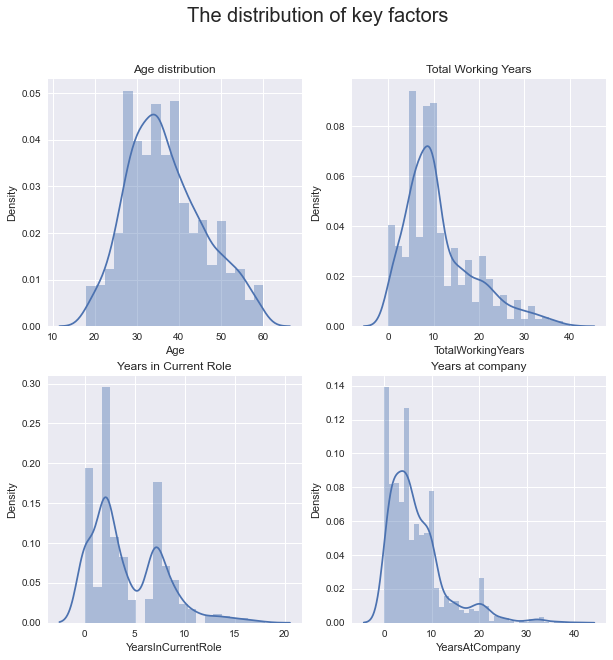

In [8]:
fig,ax = plt.subplots(2,2, figsize=(10,10))
plt.suptitle("The distribution of key factors", fontsize=20)
sns.distplot(HR['Age'], ax = ax[0,0])
ax[0][0].set_title('Age distribution')
sns.distplot(HR['TotalWorkingYears'], ax = ax[0,1])
ax[0][1].set_title('Total Working Years')
sns.distplot(HR['YearsInCurrentRole'], ax = ax[1,0])
ax[1][0].set_title('Years in Current Role')
sns.distplot(HR['YearsAtCompany'], ax = ax[1,1])
ax[1][1].set_title('Years at company')

plt.show()

The above plots show that most of the employees are in the age group of 28-40 years and have total working experience of around 6-10 years. They have spent around 3-5 years at the current organization and have stayed for 2-3 years in the current role.

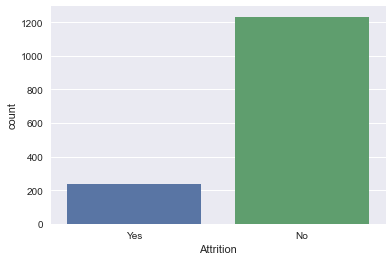

In [9]:
# checking attrition by count plot to check the numbers
sns.countplot(HR['Attrition'])
plt.show()

We see that more than 1200 employees have maintained good relationship with the organisation while around 250 people have not.

The salary of a person plays an important role for him/her to like the role he is playing in the organisation. So lets check out the attrition rate based on salary and sex of employee.

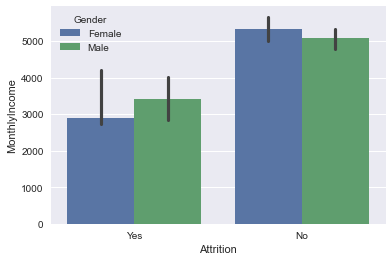

In [10]:
from numpy import median
sns.barplot(x='Attrition', y='MonthlyIncome', hue= 'Gender',data=HR, estimator=median)
plt.show()

We see that attrition is similar between both sex. We can see that employees with less salary tend to leave company rather than employees with more income.

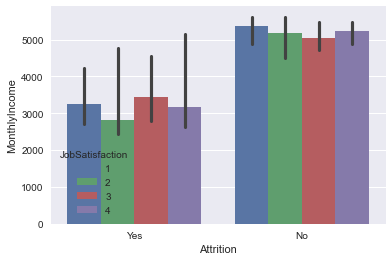

In [12]:
sns.barplot(x='Attrition', y='MonthlyIncome', hue= 'JobSatisfaction',data=HR, estimator=median)
plt.show()

There is job satisfaction of the employees even with less salary, it is evenly distibuted. The people with less job satisfaction also tend to stay in the organisation when there is good income. 

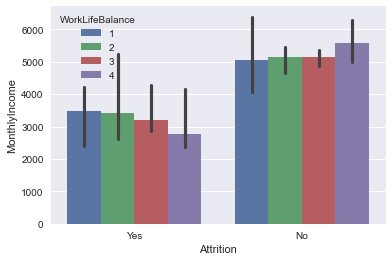

In [17]:
sns.barplot(x='Attrition', y='MonthlyIncome', hue= 'WorkLifeBalance',data=HR, estimator=median)
plt.show()